# Final Model Evaluations 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from keras.models import model_from_json
import pickle
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import itertools

Using TensorFlow backend.


In [2]:
#load json and create model
def load_model(name_json,name_weights):
    json_file=open(name_json,'r')
    loaded_model_json=json_file.read()
    json_file.close()
    loaded_model=model_from_json(loaded_model_json)
    #load weights into new model
    loaded_model.load_weights(name_weights)
    print('Loaded model from disk')
    return loaded_model

## Create Test Generators for the different Models 

In [3]:
datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = False,
fill_mode = "nearest",
zoom_range = 0,
width_shift_range = 0,
height_shift_range=0,
rotation_range=0)

In [41]:
test_image_dir='output/test'
image_size=(224,224)
batch_size=128

vgg_test_generator = datagen.flow_from_directory(
test_image_dir,
target_size = (image_size[0], image_size[1]),
batch_size = batch_size, 
class_mode = "categorical",
shuffle=False)

Found 10100 images belonging to 101 classes.


In [8]:
test_image_dir='output/test'
image_size=(331,331)
batch_size=8

nas_test_generator = datagen.flow_from_directory(
test_image_dir,
target_size = (image_size[0], image_size[1]),
batch_size = batch_size, 
class_mode = "categorical",
shuffle=False)

Found 10100 images belonging to 101 classes.


In [12]:
test_image_dir='output/test'
image_size=(229,229)
batch_size=64

incRes_test_generator = datagen.flow_from_directory(
test_image_dir,
target_size = (image_size[0], image_size[1]),
batch_size = batch_size, 
class_mode = "categorical",
shuffle=False)

Found 10100 images belonging to 101 classes.


In [5]:
def load_specfic_model(name):
    if name=='nas':
        nas_final=load_model('nas_net_3.json','nas_net_3_weights.h5')
        return nas_final
    elif name=='vgg':
        vgg_final=load_model('vgg_models/vgg_model_3.json','vgg_models/vgg_model_3_weights.h5')
        return vgg_final
    elif name=='incRes':
        incRes_final=load_model('inceptResNetV2_model_2_1.json','inceptResNetV2_model_2_1_weights.h5')
        return incRes_final

## VGG final

In [8]:
vgg_final=load_specfic_model('vgg')

In [10]:
vgg_final.compile(optimizer=Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])
vgg_scores=vgg_final.evaluate_generator(vgg_test_generator,steps=len(vgg_test_generator))
vgg_scores

[1.2518320633633302, 0.7097029705330877]

In [42]:
vgg_predicted=vgg_final.predict_generator(vgg_test_generator,steps=len(vgg_test_generator))
vgg_predicted2=np.argmax(vgg_predicted,axis=1)
vgg_predicted2

array([  0,   0,   0, ...,  39, 100, 100])

In [37]:
num_files=len(vgg_test_generator.filenames)
num_batches=len(vgg_test_generator)

vgg_test_labels=[]

for i in range(0,int(num_batches)):
    vgg_test_labels.extend(np.array(vgg_test_generator[i][1]))

In [38]:
vgg_test_labels2=np.argmax(vgg_test_labels,axis=1)
vgg_test_labels2

array([  0,   0,   0, ..., 100, 100, 100])

## Calculating accuracy score on VGG test set

In [48]:
accuracy = (vgg_predicted2 == vgg_test_labels2)
accuracy.sum()/10100

0.7097029702970297

## Plot Confusion Matrix and Classification Report

In [58]:
#load label dictionary
pkl_file=open('label_dictionary.pkl','rb')
decoder=pickle.load(pkl_file)
pkl_file.close()

In [51]:
#load label dictionary 
label_map=(vgg_test_generator.class_indices)

In [116]:
# # Compute confusion matrix
cnf_matrix = confusion_matrix(vgg_test_labels2, vgg_predicted2);

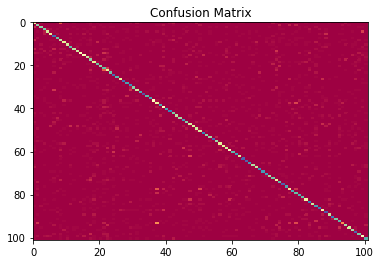

In [101]:
f=plt.figure()
plt.pcolor(cnf_matrix,cmap='Spectral')
plt.gca().invert_yaxis()
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix_vgg.png')

In [108]:
print(classification_report(vgg_test_labels2, vgg_predicted2))

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       100
           1       0.66      0.71      0.69       100
           2       0.84      0.71      0.77       100
           3       0.73      0.74      0.74       100
           4       0.85      0.61      0.71       100
           5       0.69      0.57      0.62       100
           6       0.64      0.91      0.75       100
           7       0.78      0.76      0.77       100
           8       0.49      0.63      0.55       100
           9       0.69      0.58      0.63       100
          10       0.77      0.61      0.68       100
          11       0.72      0.77      0.74       100
          12       0.86      0.65      0.74       100
          13       0.79      0.62      0.70       100
          14       0.82      0.51      0.63       100
          15       0.65      0.50      0.56       100
          16       0.72      0.63      0.67       100
          17       0.51    

## Top 3 and Lowest 3 accuracy scores and their respective classes for VGG16

In [22]:
print('VGG16: The 3 lowest categories with precision accuracy are ',decoder[0], ' with 46%, ', 
      decoder[22], ' with 46%, and', decoder[37], ' with 46%.')

VGG16: The 3 lowest categories with precision accuracy are  apple_pie  with 46%,  chocolate_mousse  with 46%, and filet_mignon  with 46%.


In [24]:
print('VGG16: The 3 highest categories with precision accuracy are ',decoder[33], ' with 97%, ', 
      decoder[40], ' with 94%, and', decoder[91], ' with 94%.')

VGG16: The 3 highest categories with precision accuracy are  edamame  with 97%,  french_fries  with 94%, and spaghetti_carbonara  with 94%.


# InceptionResNetV2

In [6]:
incRes_final=load_specfic_model('incRes')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Loaded model from disk


In [7]:
incRes_final.compile(optimizer=Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])
incRes_scores=incRes_final.evaluate_generator(incRes_test_generator,steps=len(incRes_test_generator))
incRes_scores

[1.1066450539673909, 0.763663366407451]

In [13]:
incRes_predicted=incRes_final.predict_generator(incRes_test_generator,steps=len(incRes_test_generator))
incRes_predicted2=np.argmax(incRes_predicted,axis=1)
incRes_predicted2

array([  0,   0,   0, ...,  98,  57, 100])

In [9]:
num_files=len(incRes_test_generator.filenames)
num_batches=len(incRes_test_generator)

incRes_test_labels=[]

for i in range(0,int(num_batches)):
    incRes_test_labels.extend(np.array(incRes_test_generator[i][1]))

In [10]:
incRes_test_labels2=np.argmax(incRes_test_labels,axis=1)
incRes_test_labels2

array([  0,   0,   0, ..., 100, 100, 100])

## Accuracy Score on Test Set for InceptionResNetV2

In [14]:
accuracy = (incRes_predicted2 == incRes_test_labels2)
accuracy.sum()/10100

0.7636633663366337

## Plot Confusion Matrix and Classification Report

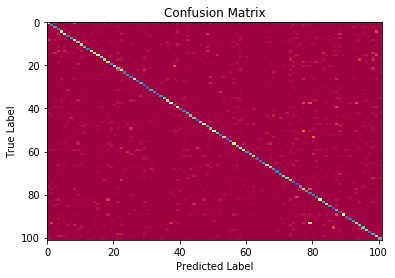

In [17]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(incRes_test_labels2, incRes_predicted2);
f=plt.figure()
plt.pcolor(cnf_matrix,cmap='Spectral')
plt.gca().invert_yaxis()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix_incRes.png')

In [18]:
print(classification_report(incRes_test_labels2, incRes_predicted2))

              precision    recall  f1-score   support

           0       0.61      0.44      0.51       100
           1       0.79      0.84      0.82       100
           2       0.74      0.82      0.78       100
           3       0.62      0.87      0.72       100
           4       0.75      0.65      0.70       100
           5       0.69      0.58      0.63       100
           6       0.84      0.89      0.86       100
           7       0.84      0.81      0.83       100
           8       0.55      0.56      0.55       100
           9       0.68      0.73      0.71       100
          10       0.73      0.68      0.70       100
          11       0.76      0.78      0.77       100
          12       0.89      0.87      0.88       100
          13       0.85      0.57      0.68       100
          14       0.82      0.65      0.73       100
          15       0.70      0.57      0.63       100
          16       0.86      0.72      0.78       100
          17       0.77    

In [19]:
#load label dictionary
pkl_file=open('label_dictionary.pkl','rb')
decoder=pickle.load(pkl_file)
pkl_file.close()

## Top 3 and Lowest 3 accuracy scores and their respective classes for InceptionResNetV2

In [20]:
print('The 3 lowest categories with precision accuracy are ',decoder[77], ' with 48%, ', 
      decoder[87], ' with 48%, and', decoder[79], ' with 51%.')

The 3 lowest categories with precision accuracy are  pork_chop  with 48%,  scallops  with 48%, and prime_rib  with 51%.


In [21]:
print('The 3 highest categories with precision accuracy are ',decoder[33], ' with 98%, ', 
      decoder[32], ' with 96%, and', decoder[64], ' with 95%.')

The 3 highest categories with precision accuracy are  edamame  with 98%,  dumplings  with 96%, and miso_soup  with 95%.


# NASNet

In [6]:
nas_final=load_specfic_model('nas')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Loaded model from disk


In [7]:
nas_final.compile(optimizer=Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])
nas_scores=nas_final.evaluate_generator(nas_test_generator,steps=len(nas_test_generator))
nas_scores

[1.0421702295763604, 0.7906930693069307]

In [9]:
nas_predicted=nas_final.predict_generator(nas_test_generator,steps=len(nas_test_generator))
nas_predicted2=np.argmax(nas_predicted,axis=1)
nas_predicted2

array([  0,  62,   0, ...,  13, 100, 100])

In [10]:
num_files=len(nas_test_generator.filenames)
num_batches=len(nas_test_generator)

nas_test_labels=[]

for i in range(0,int(num_batches)):
    nas_test_labels.extend(np.array(nas_test_generator[i][1]))

In [11]:
nas_test_labels2=np.argmax(nas_test_labels,axis=1)
nas_test_labels2

array([  0,   0,   0, ..., 100, 100, 100])

## Accuracy score for NASNet on test set

In [12]:
accuracy = (nas_predicted2 == nas_test_labels2)
accuracy.sum()/10100

0.7906930693069307

## Plot Confusion Matrix and Classification Report

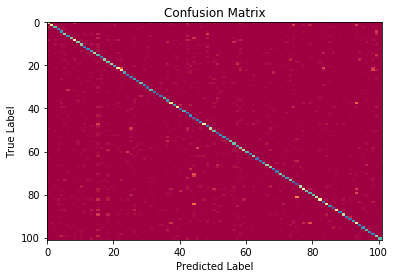

In [17]:
# Compute confusion matrix
cm = confusion_matrix(nas_test_labels2, nas_predicted2);
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
f=plt.figure()
plt.pcolor(cm,cmap='Spectral')
plt.gca().invert_yaxis()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix_nas.png')

In [22]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

## This looks at the normalized confusion matrix for NASNet

In [32]:
print(cm)

[[0.59 0.   0.01 0.   0.   0.   0.01 0.   0.07 0.01 0.   0.   0.   0.
  0.   0.01 0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.01 0.   0.   0.02 0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.
  0.04 0.   0.   0.   0.02 0.   0.   0.01 0.01 0.   0.01 0.   0.   0.
  0.   0.02 0.03 0.   0.   0.   0.01 0.01 0.   0.   0.01 0.   0.   0.
  0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.01 0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.02 0.   0.01 0.
  0.01 0.   0.  ]
 [0.   0.6  0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.01 0.   0.03 0.   0.   0.   0.   0.01 0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.01 0.   0.   0.
  0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.1  0.   0.   0.03 0.   0.06 0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.1  0.   0.   0.   0.
  

In [24]:
print(classification_report(nas_test_labels2, nas_predicted2))

              precision    recall  f1-score   support

           0       0.78      0.59      0.67       100
           1       0.90      0.60      0.72       100
           2       0.85      0.79      0.82       100
           3       0.81      0.89      0.85       100
           4       0.68      0.85      0.76       100
           5       0.69      0.71      0.70       100
           6       0.82      0.86      0.84       100
           7       0.97      0.74      0.84       100
           8       0.71      0.54      0.61       100
           9       0.81      0.74      0.77       100
          10       0.78      0.74      0.76       100
          11       0.74      0.88      0.80       100
          12       0.89      0.87      0.88       100
          13       0.73      0.83      0.78       100
          14       0.92      0.68      0.78       100
          15       0.39      0.80      0.52       100
          16       0.77      0.89      0.82       100
          17       0.87    

In [26]:
#load label dictionary
pkl_file=open('label_dictionary.pkl','rb')
decoder=pickle.load(pkl_file)
pkl_file.close()

## Top 3 and Lowest 3 accuracy scores and their respective classes for NASNet

In [27]:
print('The 3 lowest categories with precision accuracy are ',decoder[15], ' with 39%, ', 
      decoder[93], ' with 46%, and', decoder[99], ' with 54%.')

The 3 lowest categories with precision accuracy are  ceviche  with 39%,  steak  with 46%, and tuna_tartare  with 54%.


In [28]:
print('The 4 highest categories with precision accuracy are ',decoder[100], ' with 100%, ', 
      decoder[23], ' with 98% ', decoder[54], ' with 98%, and', decoder[88], ' with 98%.')

The 4 highest categories with precision accuracy are  waffles  with 100%,  churros  with 98%  hot_and_sour_soup  with 98%, and seaweed_salad  with 98%.


## Looking deeper into misclassifications

In [109]:
#ramen and pho
print(cm[81][75]) #ramen classified as pho
print(cm[75][81]) #pho classified as ramen

0.23
0.0


In [56]:
#ramen and pho
print(decoder[81],' was the most mispredicted with',decoder[75],'.', cm[81][75]*100, '% of the time it was predicted as ',
      decoder[75], ' when it was actually ', decoder[81])

ramen  was the most mispredicted with pho . 23.0 % of the time it was predicted as  pho  when it was actually  ramen


In [107]:
#steak and filet mignon
print(cm[37][93]) #filet mignon classified as steak
print(cm[93][37]) #steak classified as filet mignon

0.17
0.08


In [64]:
#steak and filet mignon
print(decoder[37],' was the often mispredicted with',decoder[93],'.', cm[37][93]*100, '% of the time it was predicted as ',
      decoder[93], ' when it was actually ', decoder[37])

filet_mignon  was the often mispredicted with steak . 17.0 % of the time it was predicted as  steak  when it was actually  filet_mignon


In [105]:
#steak and prime rib
print(cm[93][79]) #steak classified as prime rib
print(cm[79][93]) #prime rib classified as steak


0.13
0.12


In [106]:
#steak and prime rib
print(decoder[93],' was the often mispredicted with',decoder[79],'.', cm[93][79]*100, '% of the time it was predicted as ',
      decoder[79], ' when it was actually ', decoder[93])
print('The opposite is true for this one too.', cm[79][93]*100, '% of the time it was predicted as ',decoder[93], 
      ' when it was actually', decoder[79])

steak  was the often mispredicted with prime_rib . 13.0 % of the time it was predicted as  prime_rib  when it was actually  steak
The opposite is true for this one too. 12.0 % of the time it was predicted as  steak  when it was actually prime_rib


In [104]:
#fried rice and phad thai
print(cm[70][44]) #phad thai classified fried rice 
print(cm[44][70]) #fried rice classified as phad thai

0.13
0.0


In [72]:
#fried rice and phad thai
print(decoder[70],' was the often mispredicted with',decoder[44],'.', cm[70][44]*100, '% of the time it was predicted as ',
      decoder[44], ' when it was actually ', decoder[70])

pad_thai  was the often mispredicted with fried_rice . 13.0 % of the time it was predicted as  fried_rice  when it was actually  pad_thai


In [102]:
#chocolate cake and chocolate mousse
print(cm[21][22]) #chocolate cake classified as chocolate mousse
print(cm[22][21]) #chocolate mousse classified as chocolate cake

0.13
0.03


In [85]:
#choclate ckae and chocolate mousse
print(decoder[21],' was the often mispredicted with',decoder[22],'.', cm[21][22]*100, '% of the time it was predicted as ',
      decoder[22], ' when it was actually ', decoder[21])

chocolate_cake  was the often mispredicted with chocolate_mousse . 13.0 % of the time it was predicted as  chocolate_mousse  when it was actually  chocolate_cake


In [101]:
#chocolate cake and red velvet cake
print(cm[21][83]) #choclate cake classified as red velvet cake
print(cm[83][21]) #red velvet cake classified as chocolate cake

0.12
0.0


In [86]:
#chocolate cake and red velvet cake
print(decoder[21],' was the often mispredicted with',decoder[83],'.', cm[21][83]*100, '% of the time it was predicted as ',
      decoder[83], ' when it was actually ', decoder[21])

chocolate_cake  was the often mispredicted with red_velvet_cake . 12.0 % of the time it was predicted as  red_velvet_cake  when it was actually  chocolate_cake


In [110]:
#chocolate cake and tiramisu
print(cm[21][98]) #chocolate cake classified as tiramisu
print(cm[98][21]) #tiramisu classified as chocolate cake

0.08
0.01


In [89]:
#choclate cake and tiramisu
print(decoder[21],' was the often mispredicted with',decoder[98],'.', cm[21][98]*100, '% of the time it was predicted as ',
      decoder[98], ' when it was actually ', decoder[21])

chocolate_cake  was the often mispredicted with tiramisu . 8.0 % of the time it was predicted as  tiramisu  when it was actually  chocolate_cake
